In [24]:
import nilearn 
import nistats 

import matplotlib.pyplot as plt
import os

from nilearn import plotting

import IPython.display as dp

from jupyterthemes import jtplot

In [44]:
# set directory path 
path = ('/data/loki_1/data/BOLD/sub-790/')
fmriprep_path = ('/data/loki_1/data/BOLD/fmriprep/')
agg_data_path = ('/data/loki_1/analysis/aggregated_data/')
fig_path = ('/data/loki_1/analysis/figures/')

In [3]:
bold_ref_fn = ('/data/loki_1/data/BOLD/fmriprep/sub-790/ses-02/func/sub-790_ses-02_task-lokicat_run-01_space-MNI152NLin2009cAsym_boldref.nii.gz')
# use mni space for parcellation 
sample_epi_fn = ('/data/loki_1/data/BOLD/fmriprep/sub-790/ses-02/func/sub-790_ses-02_task-lokicat_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz')

In [4]:
print(bold_ref_fn, '\n', sample_epi_fn)

/data/loki_1/data/BOLD/fmriprep/sub-790/ses-02/func/sub-790_ses-02_task-lokicat_run-01_space-MNI152NLin2009cAsym_boldref.nii.gz 
 /data/loki_1/data/BOLD/fmriprep/sub-790/ses-02/func/sub-790_ses-02_task-lokicat_run-01_space-MNI152NLin2009cAsym_desc-preproc_bold.nii.gz


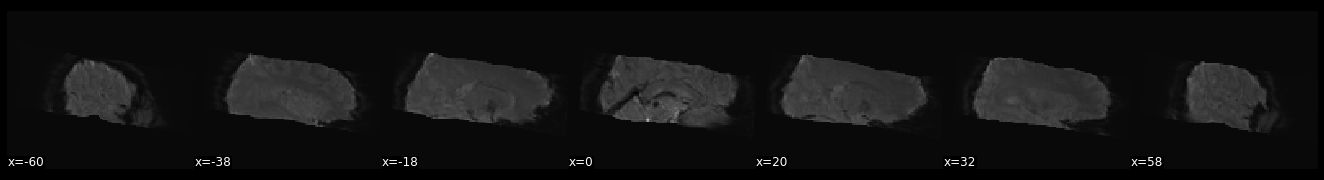

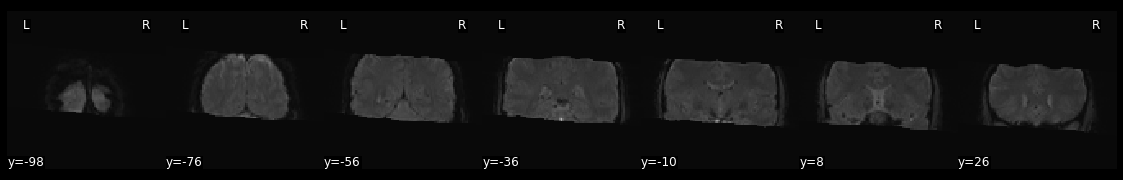

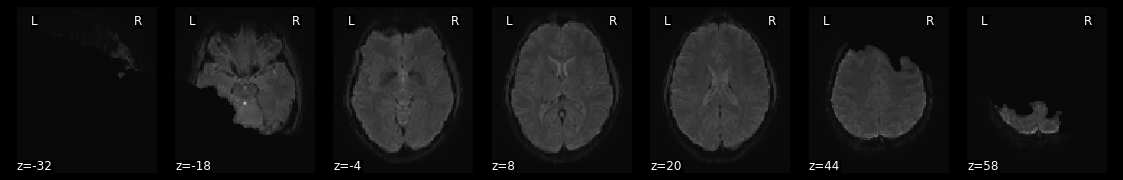

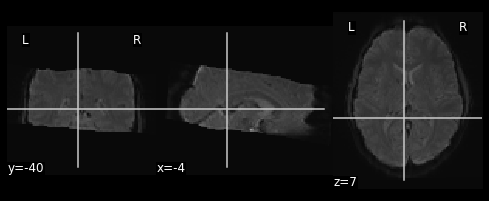

In [5]:
plotting.plot_anat(bold_ref_fn, display_mode='x') # saggital view 
plotting.plot_anat(bold_ref_fn, display_mode='y') # coronal view 
plotting.plot_anat(bold_ref_fn, display_mode='z') # axial view 

plotting.plot_anat(bold_ref_fn, display_mode='ortho') 

# sample workflow for subcortical parcellation 

In [6]:
from nilearn import datasets

dataset = datasets.fetch_atlas_pauli_2017() # get probabilistic subcortical atlas 
atlas_filename = dataset.maps # filename for the atlas
labels = dataset.labels # region labels

n_nodes = len(labels)

In [7]:
labels 

['Pu',
 'Ca',
 'NAC',
 'EXA',
 'GPe',
 'GPi',
 'SNc',
 'RN',
 'SNr',
 'PBP',
 'VTA',
 'VeP',
 'HN',
 'HTH',
 'MN',
 'STH']

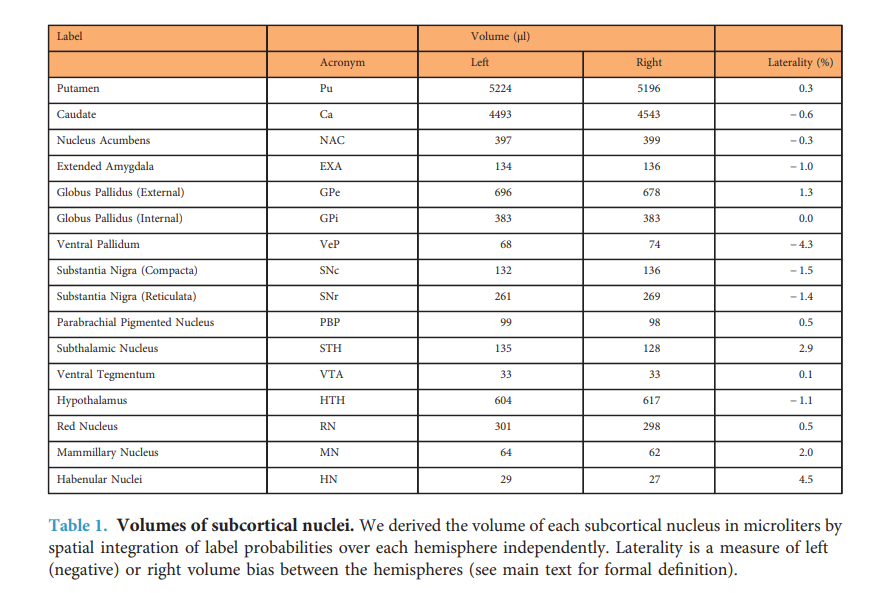

In [8]:
dp.display(dp.Image('/data/loki_1/nb_imgs/subcort_labels.png'))

In [9]:
# mask the BOLD data 
from nilearn.input_data import NiftiMapsMasker
masker = NiftiMapsMasker(maps_img=atlas_filename, standardize=True, memory='nilearn_cache', verbose=5)

# Time series of striatal nodes

In [10]:
time_series = masker.fit_transform(sample_epi_fn) # get time series matrix 

[NiftiMapsMasker.fit_transform] loading regions from /home/krista/nilearn_data/pauli_2017/pauli_2017_prob.nii.gz
Resampling maps


/home/krista/.local/lib/python3.7/site-packages/nilearn/_utils/cache_mixin.py:296: UserWarning: memory_level is currently set to 0 but a Memory object has been provided. Setting memory_level to 1.
  warnings.warn("memory_level is currently set to 0 but "


[Memory]0.8s, 0.0min    : Loading resample_img...
________________________________________resample_img cache loaded - 0.3s, 0.0min
[Memory]1.3s, 0.0min    : Loading filter_and_extract...
__________________________________filter_and_extract cache loaded - 0.0s, 0.0min


In [11]:
tr = .750
max_tr = 552.75

n_samples = len(np.arange(0, max_tr+tr, tr))

In [12]:
# time series of BOLD data should be n_samples by n_nodes np.array
assert time_series.shape == (n_samples, n_nodes), 'check dimensions of time series'

In [13]:
time_series

array([[ 2.2662547 ,  2.97193   ,  1.0024209 , ...,  2.4953225 ,
         0.5531732 ,  2.308679  ],
       [ 0.79928976,  2.1049306 ,  0.87972367, ...,  1.4574324 ,
        -0.32555974,  0.94010776],
       [ 1.2897921 ,  1.7150058 ,  0.18689628, ...,  2.5517216 ,
        -0.5467903 ,  1.8468974 ],
       ...,
       [ 0.43727437, -0.5242209 ,  0.1937263 , ..., -0.4861958 ,
        -1.3444341 , -0.5754194 ],
       [ 0.6023436 , -0.86034375,  0.31472978, ..., -3.475081  ,
         0.40683717, -0.7760255 ],
       [-0.1526666 , -0.91006416,  0.6326589 , ..., -2.6251361 ,
         0.76718897,  0.3896852 ]], dtype=float32)

In [14]:
# construct df with labels 
time_series_df = pd.DataFrame(data=time_series, columns=labels)
time_series_df['sample_n'] = np.arange(0, n_samples)
time_series_df['tr'] = np.arange(0, max_tr+tr, tr)

In [25]:
time_series_df.head()

,Pu,Ca,NAC,EXA,GPe,GPi,SNc,RN,SNr,PBP,VTA,VeP,HN,HTH,MN,STH,sample_n,tr
0,2.266255,2.971930,1.002421,1.490307,1.343273,1.131594,-0.452085,0.329685,0.183814,1.449112,-0.187074,-1.258244,0.360391,2.495322,0.553173,2.308679,0,0.00
1,0.799290,2.104931,0.879724,1.139650,0.879435,0.686737,-0.508559,-0.992244,0.559214,-0.572571,-0.004644,-0.906256,0.012001,1.457432,-0.325560,0.940108,1,0.75
2,1.289792,1.715006,0.186896,1.246972,0.603433,0.069852,1.222349,-0.792562,0.467353,0.128016,0.436231,-1.834205,2.223681,2.551722,-0.546790,1.846897,2,1.50
3,2.398250,2.170931,-0.426802,0.228989,2.282301,2.846234,1.216442,0.130083,0.714572,-0.114369,1.216136,-0.017621,1.478325,2.058441,-1.324307,0.914414,3,2.25
4,2.110759,2.329646,0.049206,1.938075,1.373984,1.373505,0.586446,-2.318520,-0.155403,-0.002751,0.523876,-1.662180,-0.311706,1.285784,-0.313103,1.057500,4,3.00


In [42]:
time_series_df.to_csv(os.path.join(agg_data_path, 'subcort_ts_sample_df.csv'), index=False)

In [26]:
striatum_df = time_series_df[['Pu', 'Ca', 'NAC', 'sample_n', 'tr']]

In [27]:
striatum_sample_df = striatum_df.iloc[0:300]

In [28]:
striatum_df['pooled_striatum'] = striatum_df.Pu + striatum_df.Ca + striatum_df.NAC

/home/krista/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [43]:
striatum_df.to_csv(os.path.join(agg_data_path, 'striatal_nodes_ts_sample_df.csv'), index=False)

Text(0.5, 1.0, 'Nucleus Accumbens')

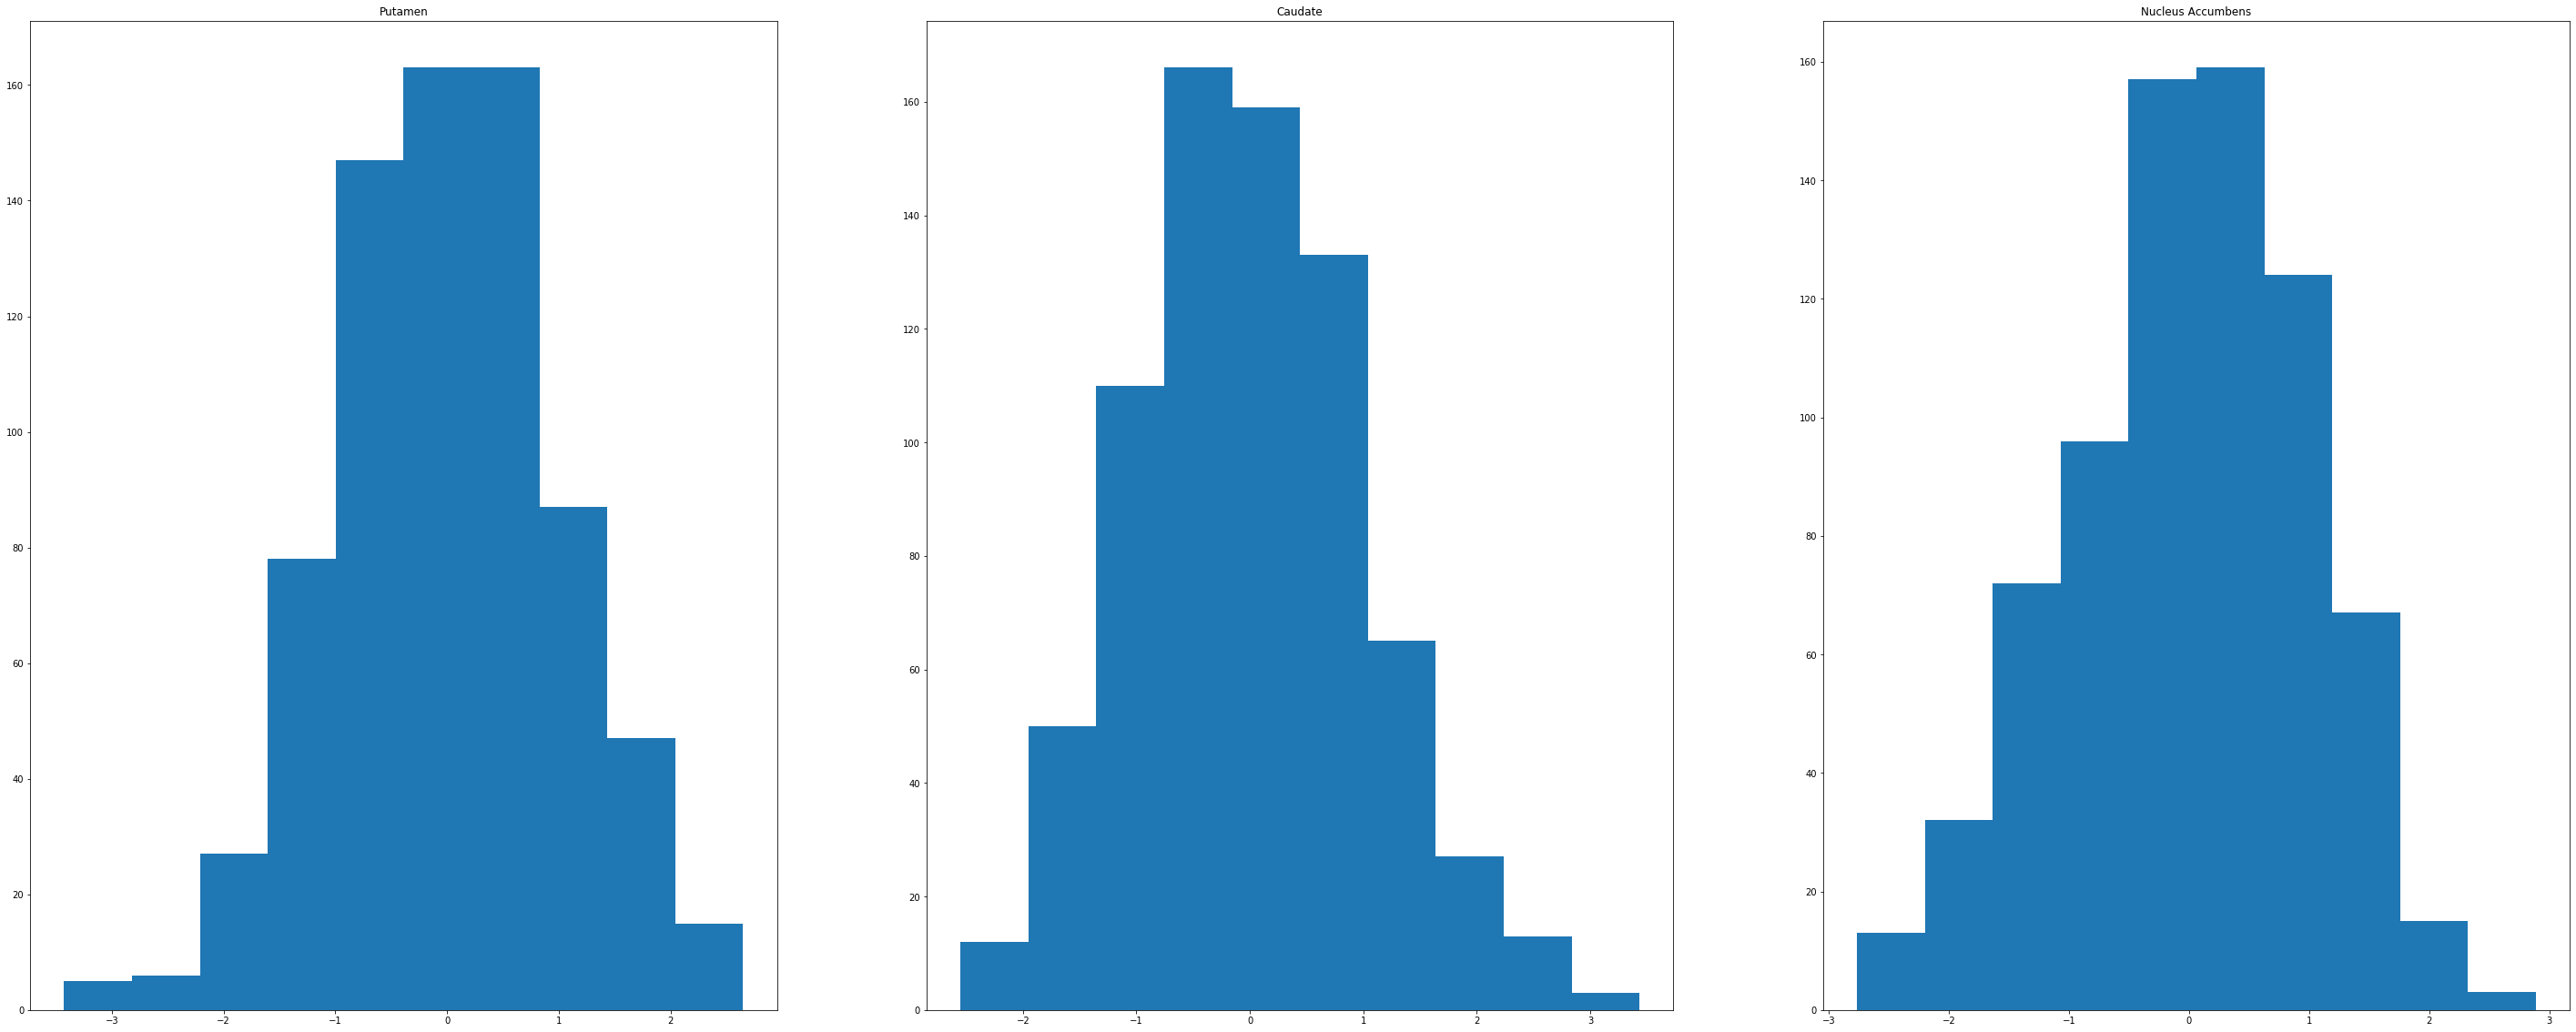

In [29]:
fig, ax = plt.subplots(1,3,figsize=(50,20))
ax[0].hist(striatum_df.Pu)
ax[1].hist(striatum_df.Ca)
ax[2].hist(striatum_df.NAC)

ax[0].set_title('Putamen')
ax[1].set_title('Caudate')
ax[2].set_title('Nucleus Accumbens')

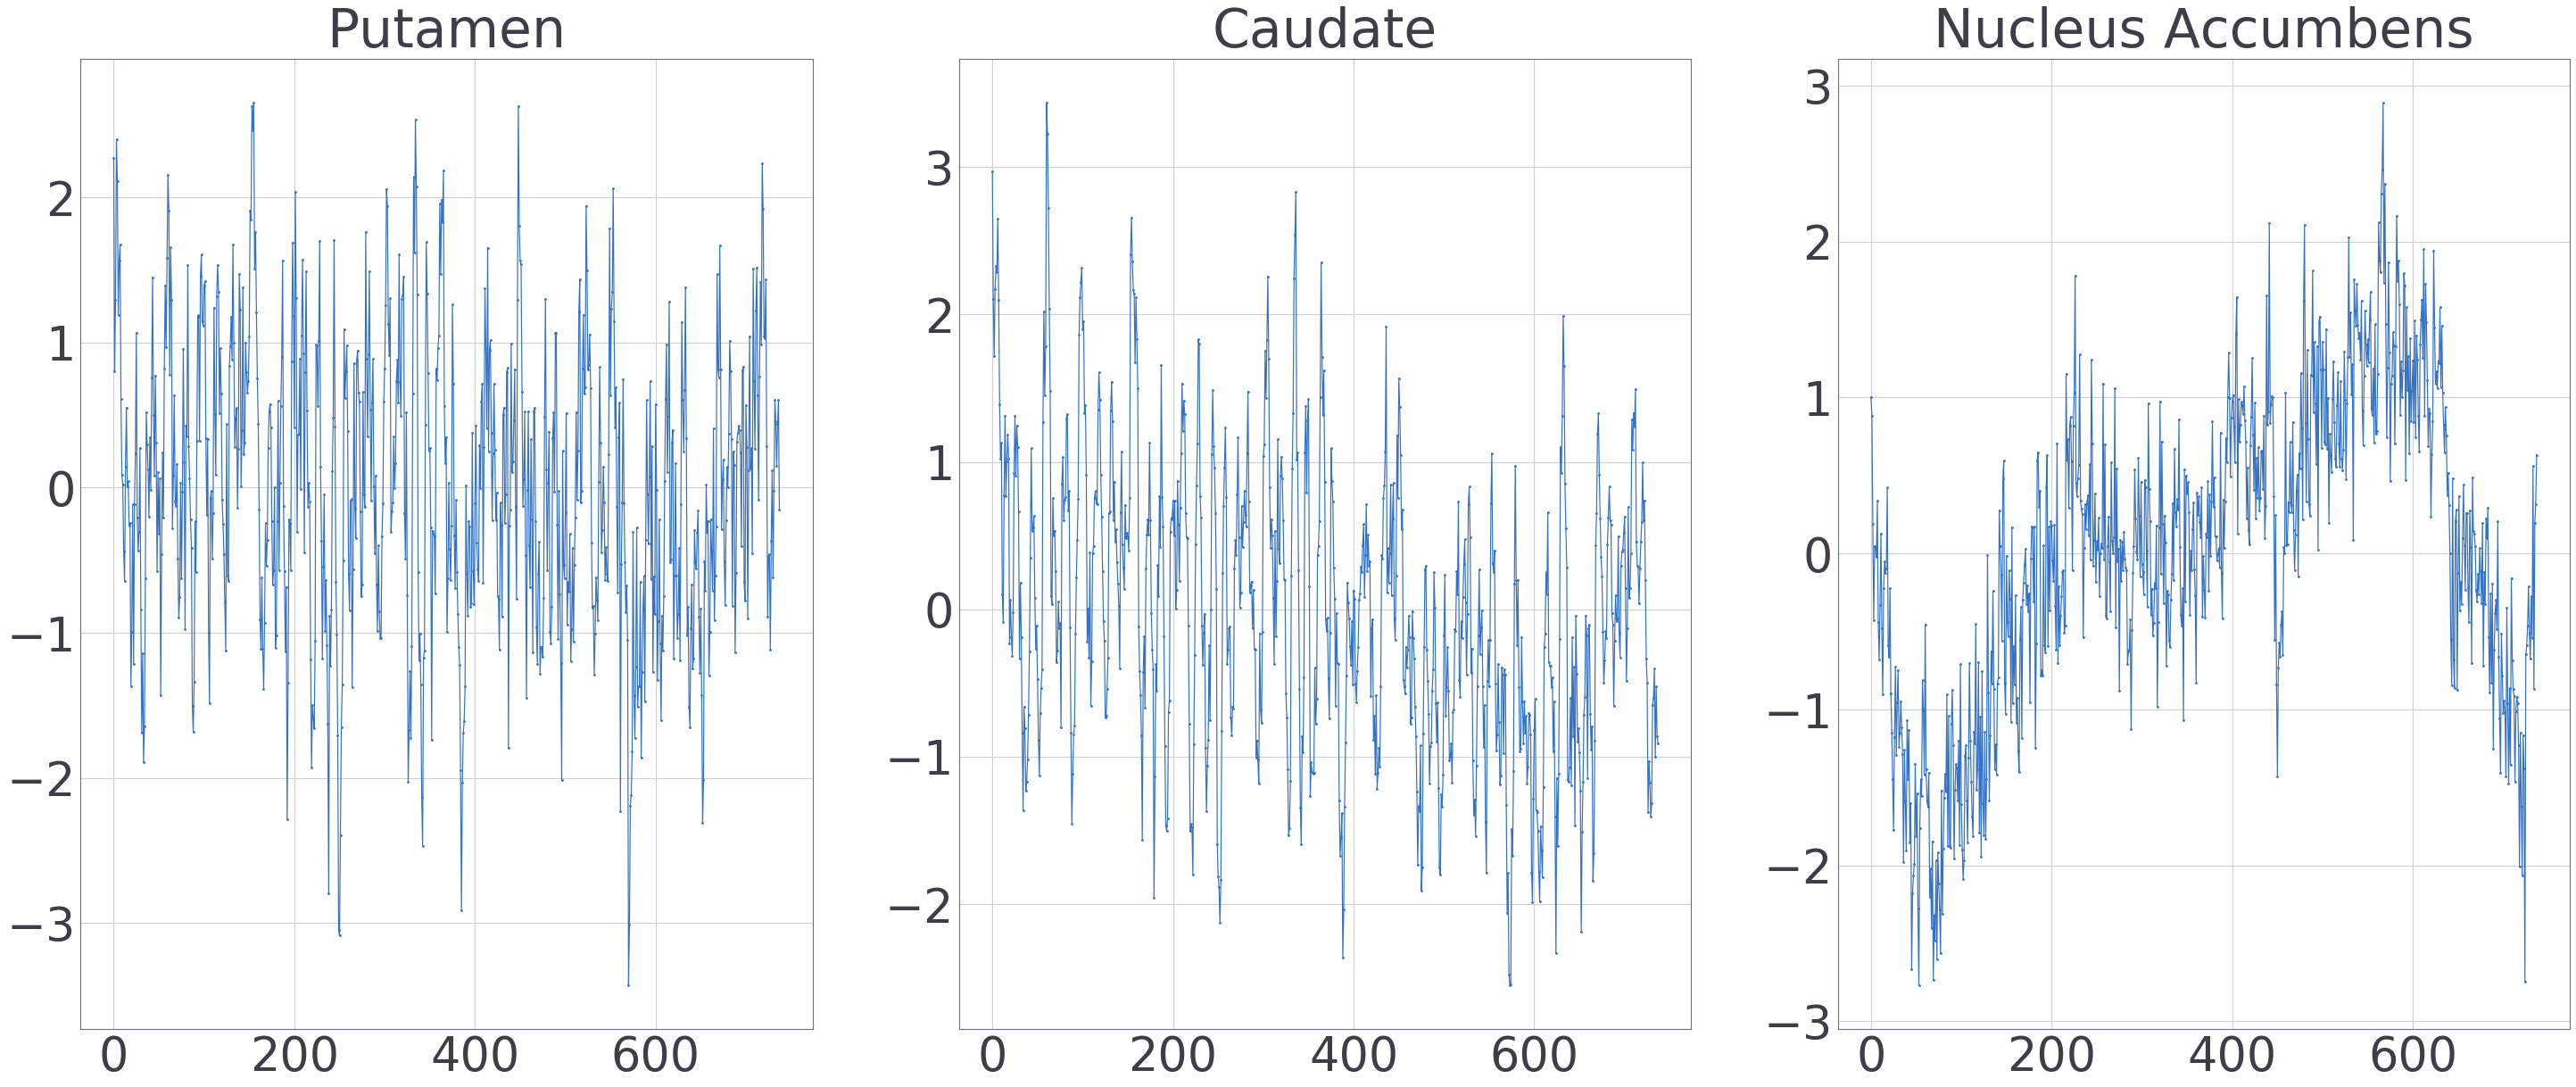

In [45]:
jtplot.style('grade3',figsize=(20, 10), fscale=5)
sns.set_color_codes("muted")

fig, ax = plt.subplots(1,3,figsize=(50,20))
ax[0].plot(striatum_df.Pu, '.-')
ax[1].plot(striatum_df.Ca, '.-')
ax[2].plot(striatum_df.NAC, '.-')

ax[0].set_title('Putamen')
ax[1].set_title('Caudate')
ax[2].set_title('Nucleus Accumbens')

plt.savefig(os.path.join(fig_path, 'striatal_node_ts.png'))

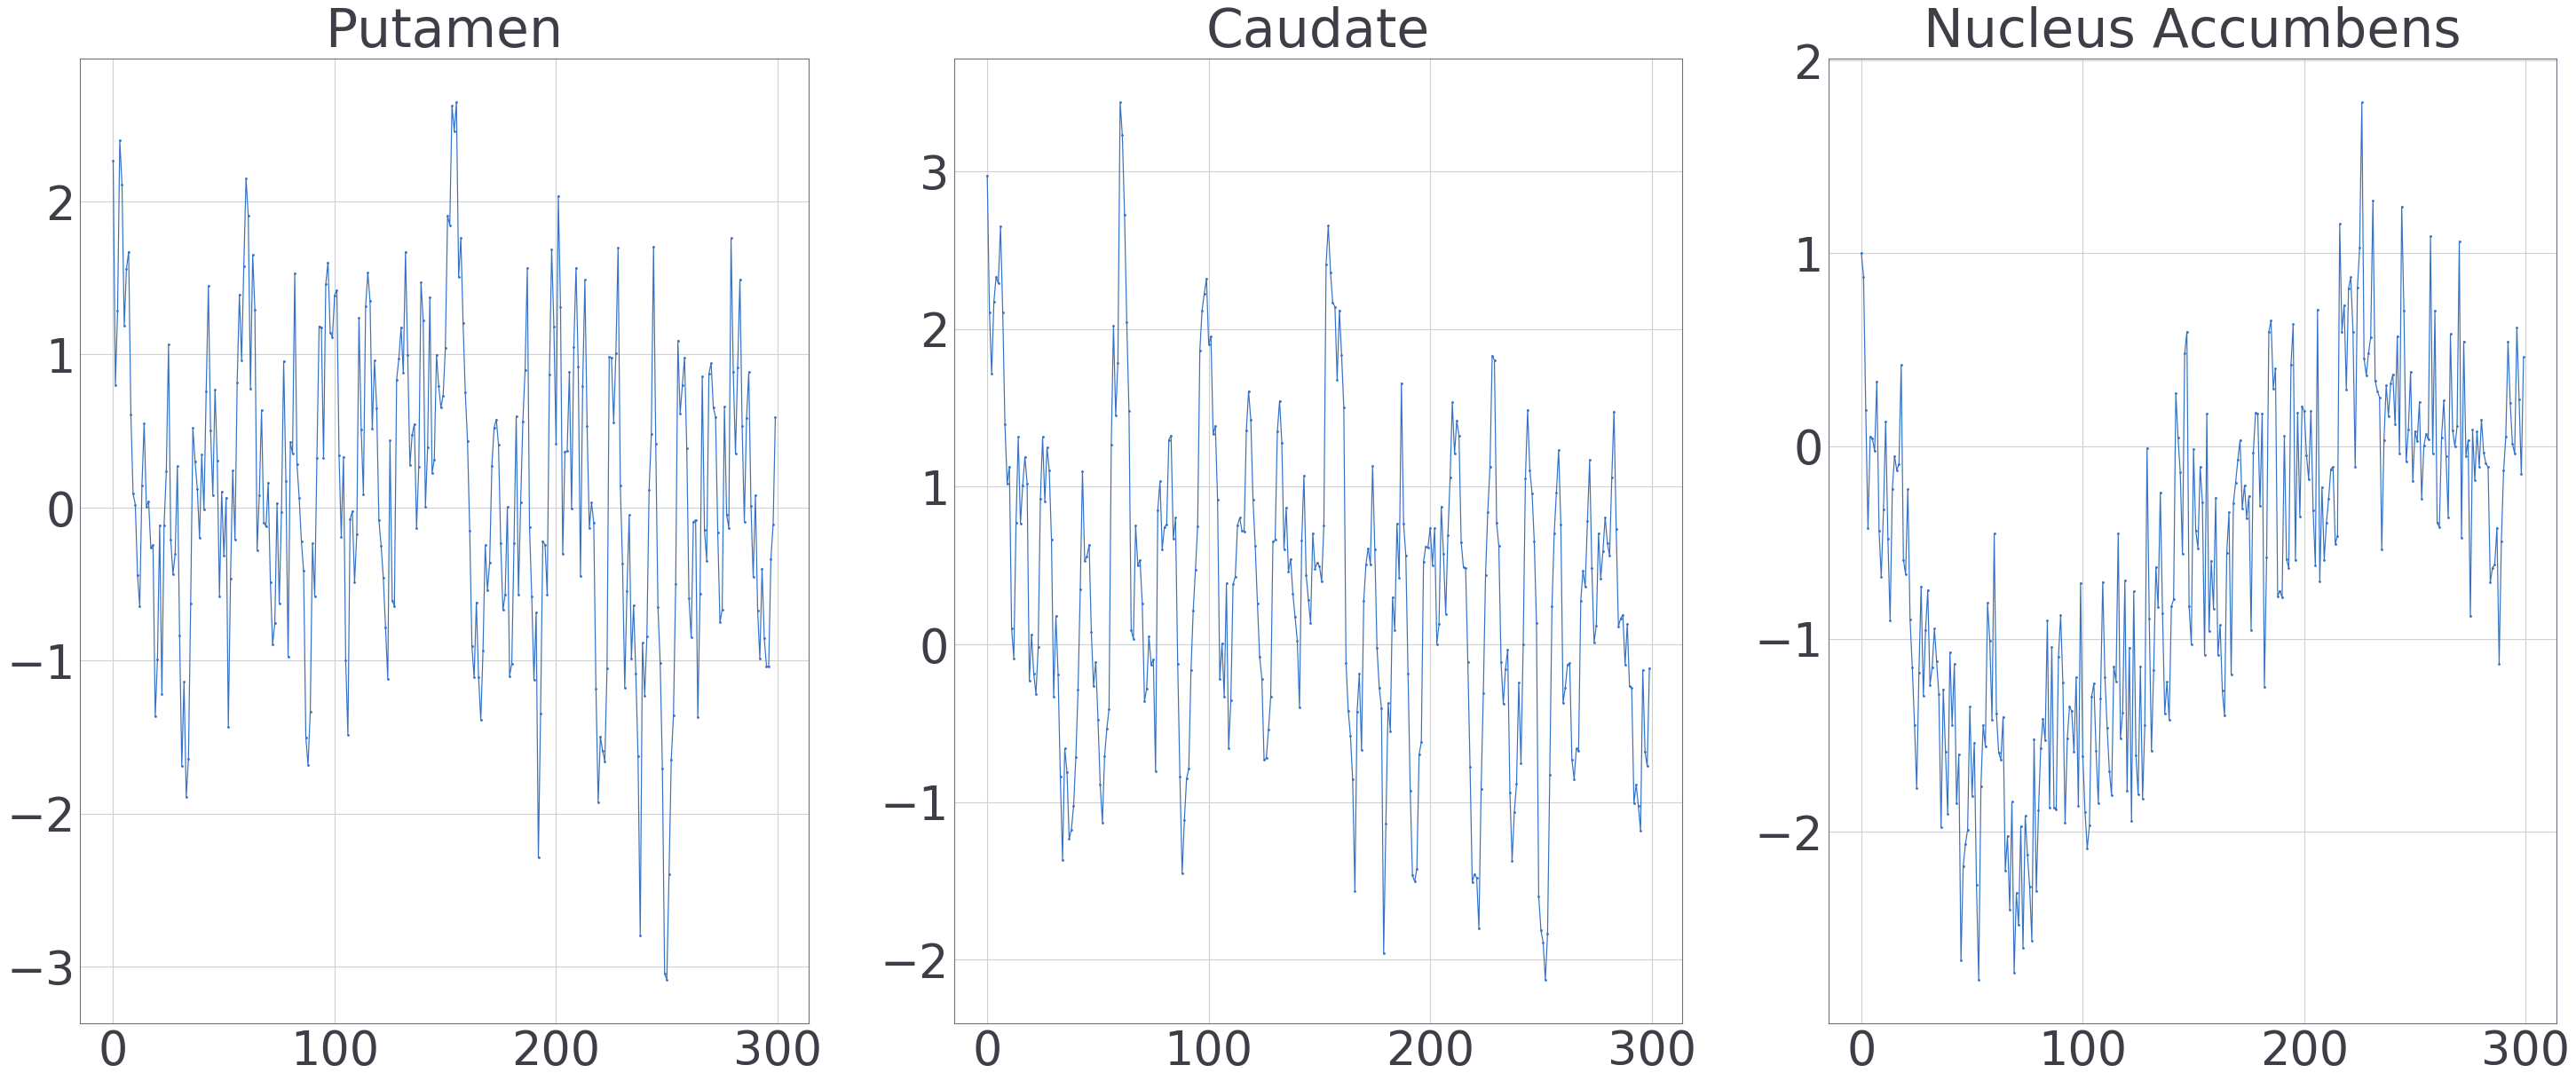

In [46]:
fig, ax = plt.subplots(1,3,figsize=(50,20))
ax[0].plot(striatum_sample_df.Pu, '.-')
ax[1].plot(striatum_sample_df.Ca, '.-')
ax[2].plot(striatum_sample_df.NAC, '.-')

ax[0].set_title('Putamen')
ax[1].set_title('Caudate')
ax[2].set_title('Nucleus Accumbens')
plt.savefig(os.path.join(fig_path, 'striatal_node_ts_sample.png'))

# Connectivity between subcortical nodes (sanity check?)

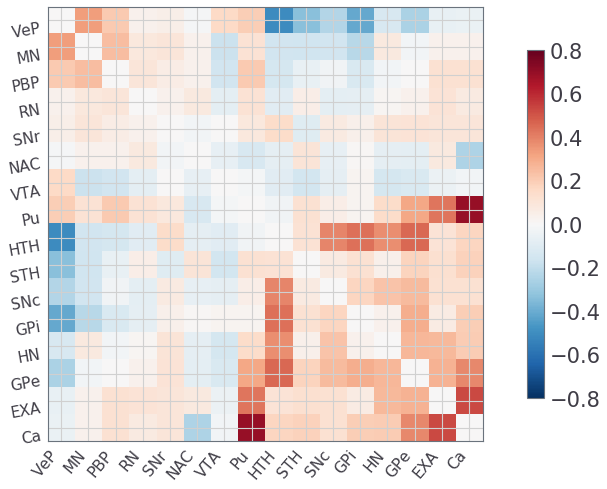

In [47]:
jtplot.style('grade3',figsize=(20, 10), fscale=2)


from nilearn.connectome import ConnectivityMeasure
correlation_measure = ConnectivityMeasure(kind='correlation')
correlation_matrix = correlation_measure.fit_transform([time_series])[0]

# Plot the correlation matrix
import numpy as np
from nilearn import plotting
# Make a large figure
# Mask the main diagonal for visualization:
np.fill_diagonal(correlation_matrix, 0)

# matrices are ordered for block-like representation
plotting.plot_matrix(correlation_matrix, figure=(10, 8), labels=labels,
                     vmax=0.8, vmin=-0.8, reorder=True)

plt.savefig(os.path.join(fig_path, 'subcort_connectivity_matrix.png'))

In [34]:
mean_correlation_matrix = correlation_measure.mean_

In [35]:
coordinates = plotting.find_probabilistic_atlas_cut_coords(maps_img=atlas_filename)

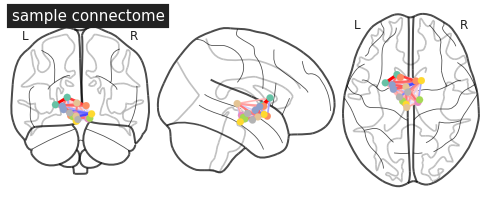

In [48]:
plotting.plot_connectome(mean_correlation_matrix, coordinates, title='sample connectome') 
# note that, in the future, need to figure out why there is an asymmetry between 
# hemispheres. seems biased toward the left side? 

plt.savefig(os.path.join(fig_path, 'subcort_connectome.png'))

# Pooled striatal node activity

(array([ 16.,  35.,  96., 154., 160., 144.,  87.,  28.,  16.,   2.]),
 array([-5.023719 , -3.8972864, -2.770854 , -1.6444215, -0.517989 ,
         0.6084435,  1.7348759,  2.8613083,  3.987741 ,  5.1141734,
         6.240606 ], dtype=float32),
 <a list of 10 Patch objects>)

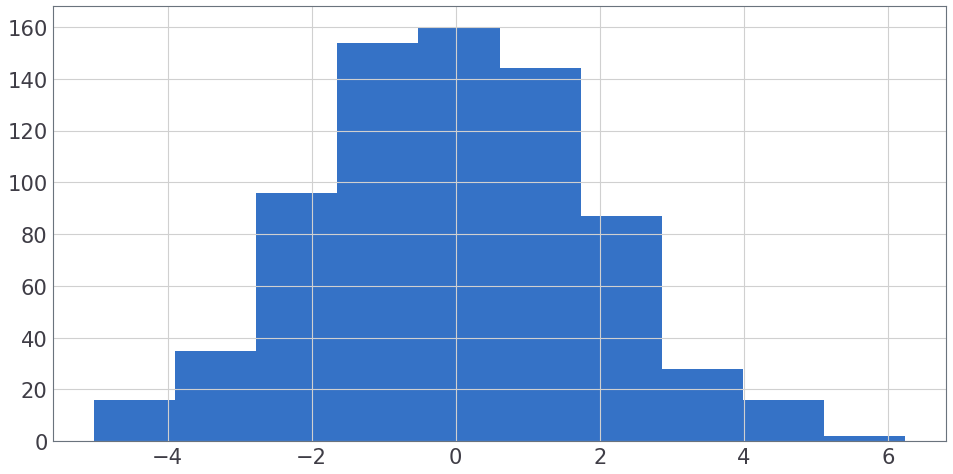

In [37]:
jtplot.style('grade3',figsize=(20, 10), fscale=2)
plt.hist(striatum_df.pooled_striatum)

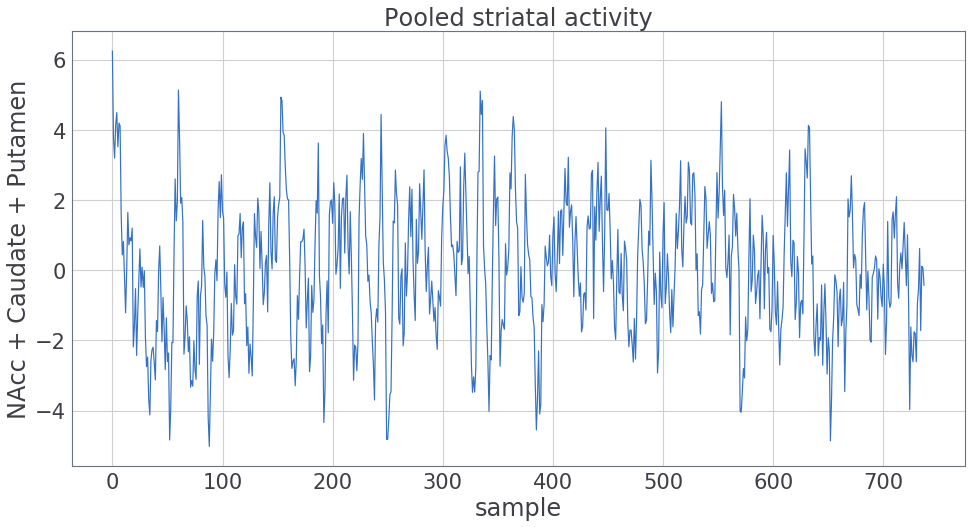

In [49]:
plt.plot(striatum_df.sample_n, striatum_df.pooled_striatum)
plt.xlabel('sample')
plt.ylabel('NAcc + Caudate + Putamen')
plt.title('Pooled striatal activity')
plt.savefig(os.path.join(fig_path, 'pooled_striatal_ts.png'))